<a href="https://colab.research.google.com/github/Shivachikkonda02/-Bank-Marketing-Analysis-and-Classification-ML-Project/blob/main/Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/loan-train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='CoapplicantIncome'>

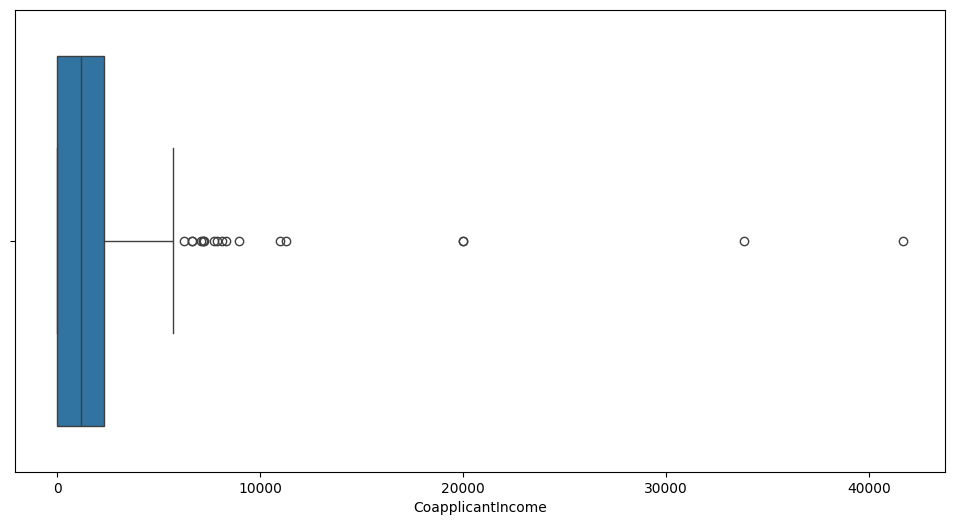

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['CoapplicantIncome'])

<Axes: xlabel='ApplicantIncome'>

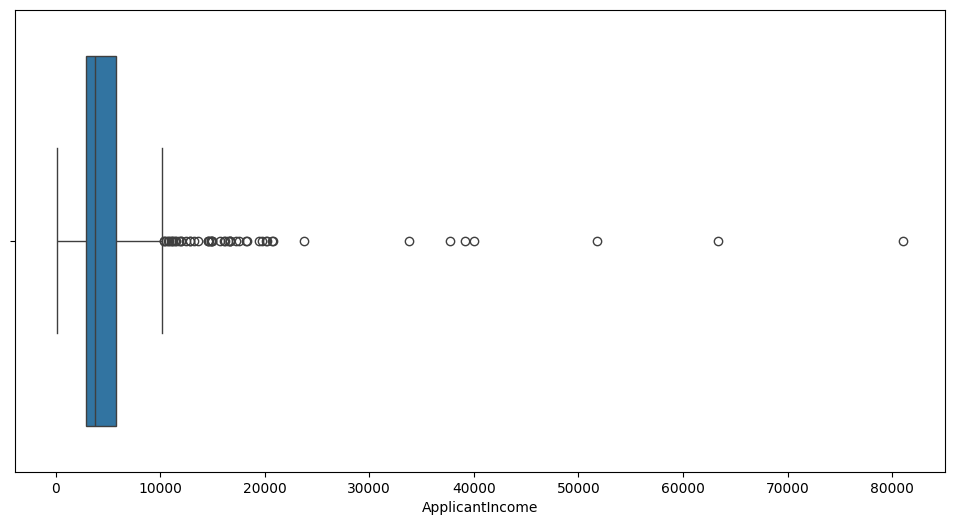

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['ApplicantIncome'])

<ipython-input-11-dd358a5a6987>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

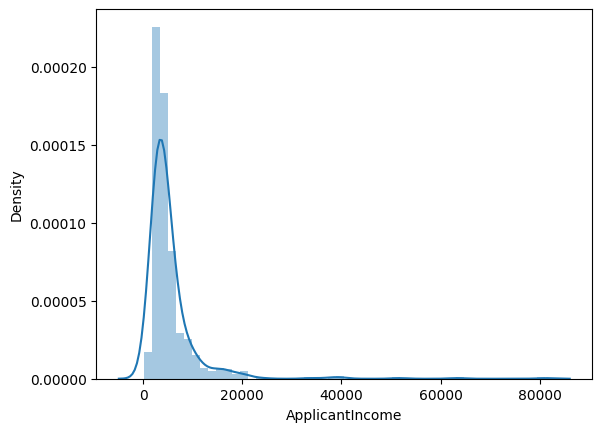

In [11]:
sns.distplot(df['ApplicantIncome'])

<Axes: >

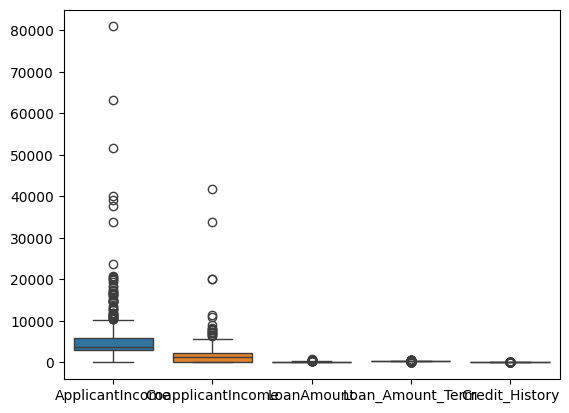

In [12]:
sns.boxplot(df)

In [16]:
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)

In [17]:
q1

0.0

In [18]:
q3

2297.25

In [20]:
IQR=q3-q1
IQR

2297.25

In [21]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)

In [22]:
min_range

-3445.875

In [23]:
max_range

5743.125

In [28]:
new_df=df[df['CoapplicantIncome']<=max_range]

<Axes: xlabel='CoapplicantIncome'>

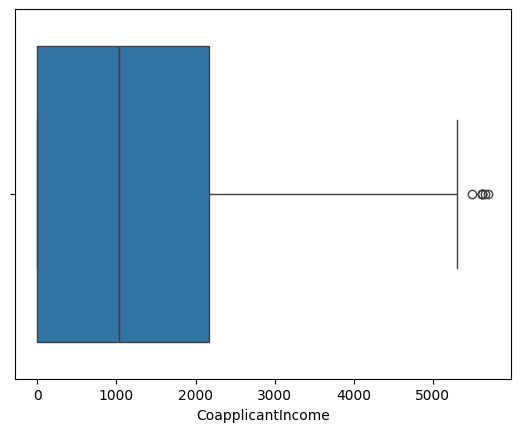

In [32]:
sns.boxplot(x=new_df['CoapplicantIncome'])

In [33]:
## Using Z-Score

In [35]:
z_score = (df['CoapplicantIncome'] - df['CoapplicantIncome'].mean()) / (df['CoapplicantIncome'].std())

In [37]:
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [39]:
df['z_score']=z_score

In [41]:
new_data=df[df['z_score']<3]

<Axes: xlabel='CoapplicantIncome'>

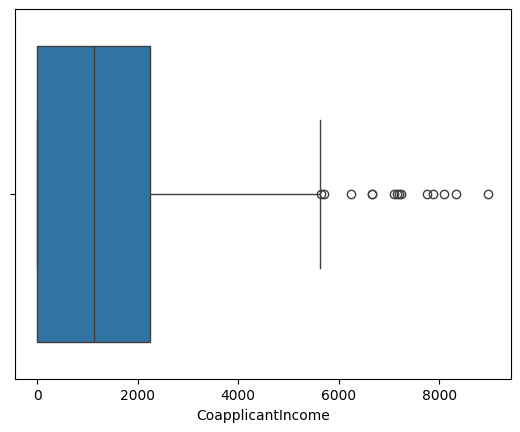

In [42]:
sns.boxplot(x=new_data['CoapplicantIncome'])

<ipython-input-43-cb0035b5192a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

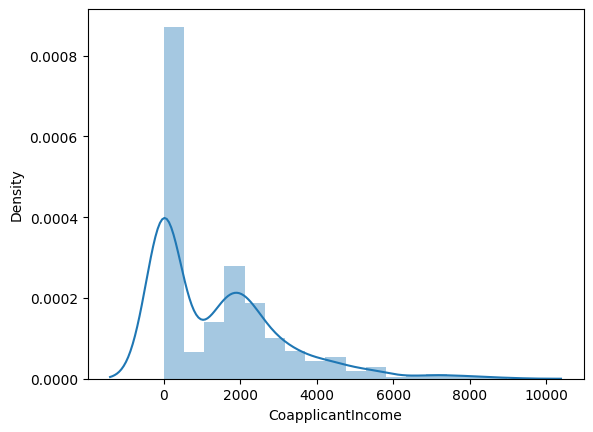

In [43]:
sns.distplot(new_data['CoapplicantIncome'])